# **Liveness Detection**
By : Reynara Ezra Pratama

Dataset : [CelebA Spoof](https://www.kaggle.com/attentionlayer241/celeba-spoof-for-face-antispoofing)

## Import Library

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 237 µs (started: 2021-10-27 05:20:45 +00:00)


In [3]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Liveness Detection/Dataset 59 Images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Liveness Detection/Dataset')
zip_ref.close()

time: 1.04 s (started: 2021-10-27 05:20:45 +00:00)


In [4]:
print(os.listdir('/tmp/Liveness Detection/Dataset'))

['Spoof', 'Live']
time: 2.92 ms (started: 2021-10-27 05:20:46 +00:00)


## Check Data

In [5]:
print('Number of Real Images : {}'.format(len(os.listdir('/tmp/Liveness Detection/Dataset/Live'))))
print('Number of Spoof Images : {}'.format(len(os.listdir('/tmp/Liveness Detection/Dataset/Spoof'))))
print('Total Images : {}'.format(
    len(os.listdir('/tmp/Liveness Detection/Dataset/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Spoof')) 
    )
)

Number of Real Images : 29
Number of Spoof Images : 30
Total Images : 59
time: 8.21 ms (started: 2021-10-27 05:20:46 +00:00)


## Split Data Into Training and Testing

In [6]:
!pip install split_folders
import splitfolders
splitfolders.ratio('/tmp/Liveness Detection/Dataset', 
                   '/tmp/Liveness Detection/Dataset/Data', 
                   seed=42, 
                   ratio=(0.8, 0.2))

Copying files: 59 files [00:00, 3363.38 files/s]

time: 3.6 s (started: 2021-10-27 05:20:46 +00:00)


In [7]:
base_dir = '/tmp/Liveness Detection/Dataset/Data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset

time: 1.79 ms (started: 2021-10-27 05:20:50 +00:00)


In [8]:
os.listdir('/tmp/Liveness Detection/Dataset/Data/train')

['Spoof', 'Live']

time: 6.2 ms (started: 2021-10-27 05:20:50 +00:00)


In [9]:
os.listdir('/tmp/Liveness Detection/Dataset/Data/val')

['Spoof', 'Live']

time: 8.67 ms (started: 2021-10-27 05:20:50 +00:00)


In [10]:
train_live_dir = os.path.join(train_dir, 'Live')
train_spoof_dir = os.path.join(train_dir, 'Spoof')

validation_live_dir = os.path.join(validation_dir, 'Live')
validation_spoof_dir = os.path.join(validation_dir, 'Spoof')

time: 3.02 ms (started: 2021-10-27 05:20:50 +00:00)


## Check Train and Test Data

**Train Data**

In [11]:
total_size_train = (
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/train/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/train/Spoof'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 47
time: 12.4 ms (started: 2021-10-27 05:20:50 +00:00)


**Test Data**

In [12]:
total_size_test = (
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/val/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/val/Spoof'))
)
print('Total Testing Data is : {}'.format(total_size_test))

Total Testing Data is : 12
time: 4.13 ms (started: 2021-10-27 05:20:50 +00:00)


## Image Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    #batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    #batch_size = 128,
    class_mode = 'binary'
)

Found 47 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
time: 898 ms (started: 2021-10-27 05:20:50 +00:00)


## Construct Model Using CNN

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

time: 5.79 s (started: 2021-10-27 05:20:51 +00:00)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

time: 18.4 ms (started: 2021-10-27 05:20:57 +00:00)


In [17]:
history = model.fit(
    train_generator,
    epochs = 50,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/50
2/2 [==============================] - 32s 991ms/step - loss: 0.6821 - accuracy: 0.5745 - val_loss: 1.1166 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 487ms/step - loss: 0.7220 - accuracy: 0.4681 - val_loss: 0.6171 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 462ms/step - loss: 0.5966 - accuracy: 0.7447 - val_loss: 0.5255 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 1s 275ms/step - loss: 0.5266 - accuracy: 0.8936 - val_loss: 0.5785 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 1s 286ms/step - loss: 0.4330 - accuracy: 0.7234 - val_loss: 0.2879 - val_accuracy: 0.9167
Epoch 6/50
2/2 [==============================] - 1s 279ms/step - loss: 0.2953 - accuracy: 0.9362 - val_loss: 0.2063 - val_accuracy: 0.9167
Epoch 7/50
2/2 [==============================] - 1s 494ms/step - loss: 0.3334 - accuracy: 0.8936 - val_loss: 0.1879 - val_accuracy: 0.9167
Epoch 8/50
2/2 [===

In [18]:
model_1 = tf.keras.models.Sequential([
# first CONV => RELU => CONV => RELU => POOL layer set                                   
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150, 150, 3)),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.25),

# second CONV => RELU => CONV => RELU => POOL layer set
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.25),

# first (and only) set of FC => RELU layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Dropout(0.5), 

# softmax classifier
  tf.keras.layers.Dense(1, activation='sigmoid')
])

time: 113 ms (started: 2021-10-27 05:22:05 +00:00)


In [19]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

time: 14.5 ms (started: 2021-10-27 05:22:06 +00:00)


In [20]:
history_1 = model_1.fit(
    train_generator,
    epochs = 50,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 1.2036 - accuracy: 0.4255 - val_loss: 0.6761 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 497ms/step - loss: 0.6402 - accuracy: 0.6383 - val_loss: 0.6654 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 274ms/step - loss: 0.6615 - accuracy: 0.5532 - val_loss: 0.6656 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 1s 288ms/step - loss: 0.6148 - accuracy: 0.6809 - val_loss: 0.6603 - val_accuracy: 0.5833
Epoch 5/50
2/2 [==============================] - 1s 282ms/step - loss: 0.6291 - accuracy: 0.6809 - val_loss: 0.6311 - val_accuracy: 0.8333
Epoch 6/50
2/2 [==============================] - 1s 479ms/step - loss: 0.5823 - accuracy: 0.7447 - val_loss: 0.5911 - val_accuracy: 0.9167
Epoch 7/50
2/2 [==============================] - 1s 475ms/step - loss: 0.5415 - accuracy: 0.7872 - val_loss: 0.5534 - val_accuracy: 0.8333
Epoch 8/50
2/2 [=======

## Plot Model History

In [21]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 23.2 ms (started: 2021-10-27 05:22:46 +00:00)


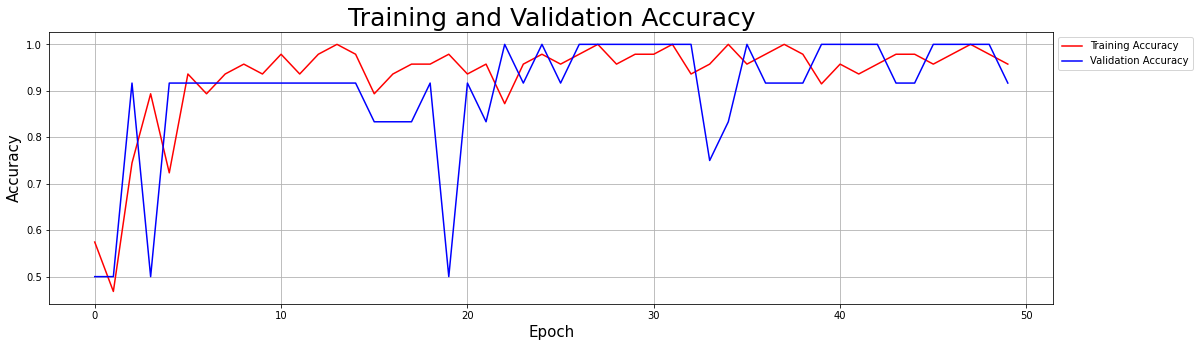

time: 325 ms (started: 2021-10-27 05:22:46 +00:00)


In [22]:
plot_accuracy(history)

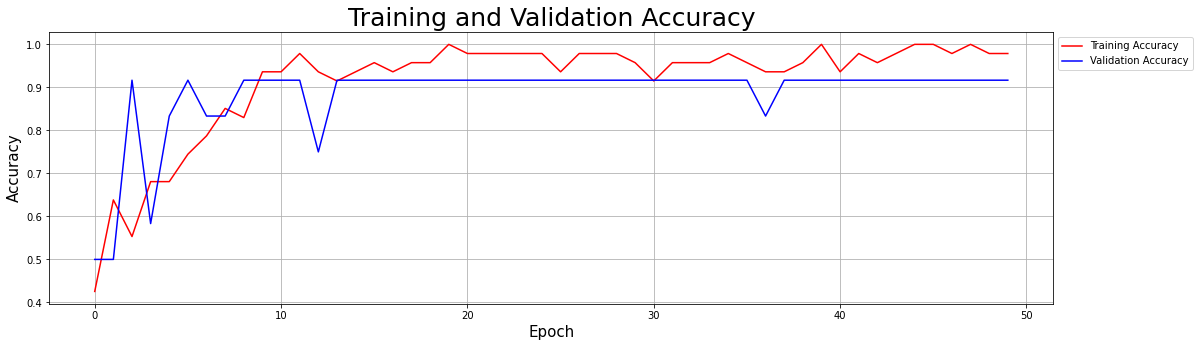

time: 275 ms (started: 2021-10-27 05:22:46 +00:00)


In [23]:
plot_accuracy(history_1)

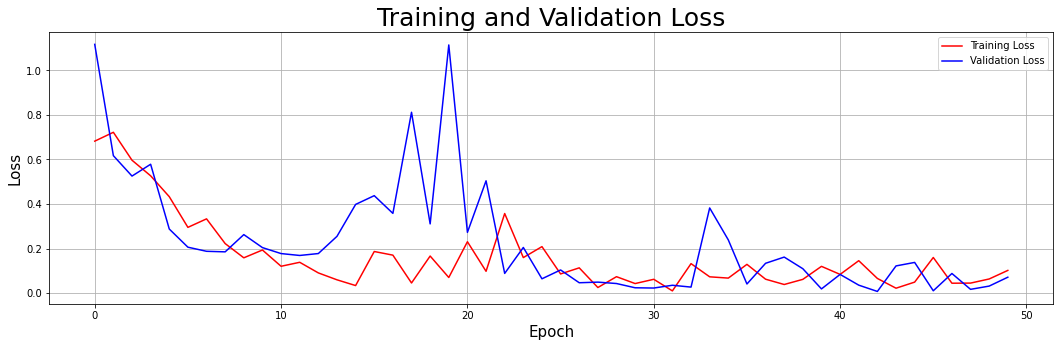

time: 290 ms (started: 2021-10-27 05:22:46 +00:00)


In [24]:
plot_loss(history)

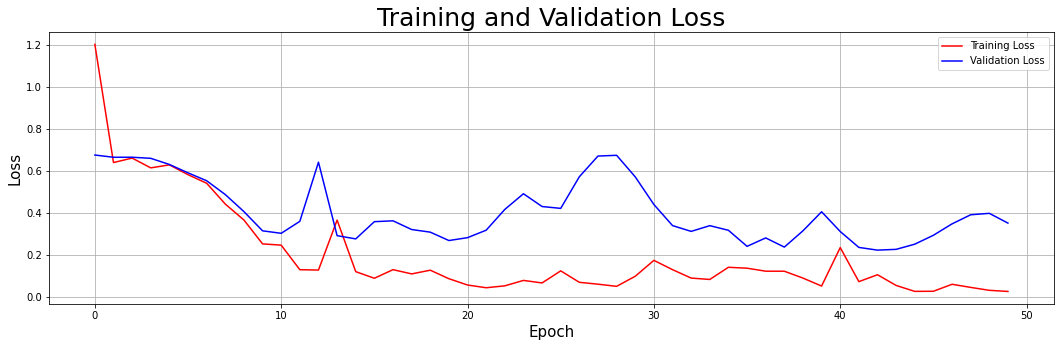

time: 267 ms (started: 2021-10-27 05:22:47 +00:00)


In [25]:
plot_loss(history_1)

In [26]:
model.save('model.h5')

time: 132 ms (started: 2021-10-27 05:22:47 +00:00)


In [27]:
model_1.save('model_1.h5')

time: 99.3 ms (started: 2021-10-27 05:22:47 +00:00)
